# Fig. 7 - Effect of additional B -> P depression

In this short simulation, we add synaptic depression, in the same format as is on the B->A connection, on the B->P depression. Since Both depressions are efferent from B, they are represented by the same `e` variable.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neurolib.models.multimodel import MultiModel

from hippocampus import HippocampalCA3Node

plt.style.use("default_light")

## Helper functions and constants
- `simulate_hc`: integrates the model with noise for a given time, either with additional B->P depression (`b_p_depression = True`) or without it (`b_p_depression = False`)

In [2]:
DT = 0.05
SAMPLING_DT = 0.1


def simulate_hc(b_p_depression, duration=5, backend="numba"):
    hc = HippocampalCA3Node(constant_depression=False, b_p_depression=b_p_depression)
    m = MultiModel.init_node(hc)
    m.model_instance.initial_state = np.array([0.0001, 0.003, 0.012, 0.649])
    m.params["backend"] = backend
    m.params["duration"] = duration * 1e3
    m.params["dt"] = DT
    m.params["sampling_dt"] = SAMPLING_DT
    m.run()
    return m.xr()

## Simulate and plot

Run short (3 seconds) simulation with and without additional B->P depression and plot as phase space in three planes: `P`-`e`, `B`-`e`, and `A`-`e`

In [3]:
no_dep = simulate_hc(False, 3)
dep = simulate_hc(True, 3)

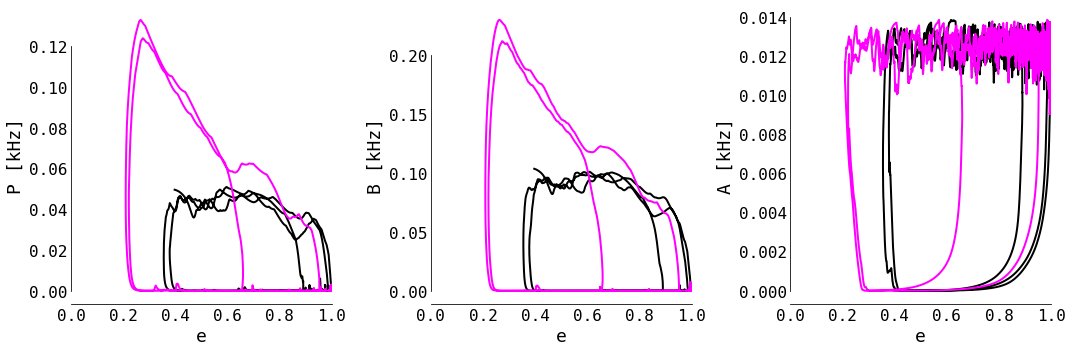

In [4]:
_, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 5))

# no B->P depression
axs[0].plot(
    no_dep.sel({"output": "e_SynDep"}).T,
    no_dep.sel({"output": "r_mean_EXC"}).T,
    color="k",
)
axs[1].plot(
    no_dep.sel({"output": "e_SynDep"}).T,
    no_dep.sel({"output": "r_mean_INH"}).T,
    color="k",
)
axs[2].plot(
    no_dep.sel({"output": "e_SynDep"}).T,
    no_dep.sel({"output": "r_mean_aSWR"}).T,
    color="k",
)

# with B->P depression
axs[0].plot(
    dep.sel({"output": "e_SynDep"}).T,
    dep.sel({"output": "r_mean_EXC"}).T,
    color="fuchsia",
)
axs[1].plot(
    dep.sel({"output": "e_SynDep"}).T,
    dep.sel({"output": "r_mean_INH"}).T,
    color="fuchsia",
)
axs[2].plot(
    dep.sel({"output": "e_SynDep"}).T,
    dep.sel({"output": "r_mean_aSWR"}).T,
    color="fuchsia",
)

axs[0].set_ylabel("P [kHz]")
axs[1].set_ylabel("B [kHz]")
axs[2].set_ylabel("A [kHz]")

for ax in axs:
    ax.set_xlabel("e")
    ax.set_xlim([0, 1.0])
    sns.despine(ax=ax, trim=True)

plt.tight_layout()

plt.savefig("../figs/b_p_depression.pdf", transparent=True, bbox_inches="tight")

## Repeat for `jitcdde` backend

In [5]:
no_dep = simulate_hc(False, 3, "jitcdde")
dep = simulate_hc(True, 3, "jitcdde")

/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=0.1. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
  0%|          | 0/30000 [00:00<?, ?it/s]

Using default integration parameters.


/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:791: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.")
100%|██████████| 30000/30000 [00:00<00:00, 199292.22it/s]


Using default integration parameters.


100%|██████████| 30000/30000 [00:00<00:00, 202815.09it/s]


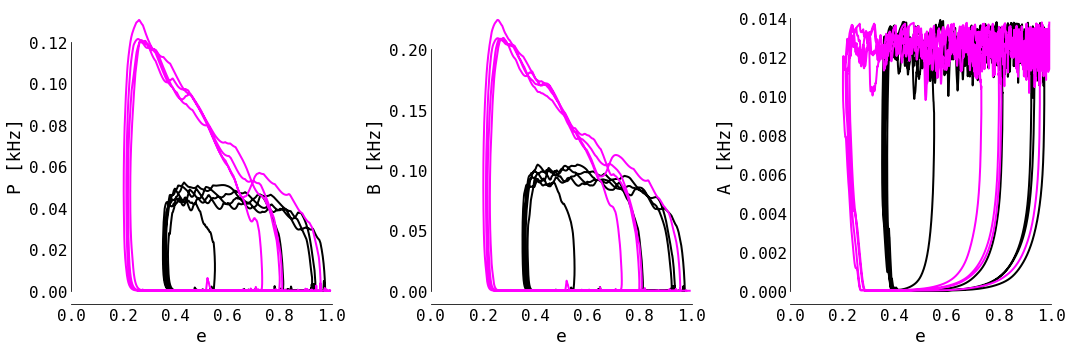

In [6]:
_, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 5))

# no B->P depression
axs[0].plot(
    no_dep.sel({"output": "e_SynDep"}).T,
    no_dep.sel({"output": "r_mean_EXC"}).T,
    color="k",
)
axs[1].plot(
    no_dep.sel({"output": "e_SynDep"}).T,
    no_dep.sel({"output": "r_mean_INH"}).T,
    color="k",
)
axs[2].plot(
    no_dep.sel({"output": "e_SynDep"}).T,
    no_dep.sel({"output": "r_mean_aSWR"}).T,
    color="k",
)

# with B->P depression
axs[0].plot(
    dep.sel({"output": "e_SynDep"}).T,
    dep.sel({"output": "r_mean_EXC"}).T,
    color="fuchsia",
)
axs[1].plot(
    dep.sel({"output": "e_SynDep"}).T,
    dep.sel({"output": "r_mean_INH"}).T,
    color="fuchsia",
)
axs[2].plot(
    dep.sel({"output": "e_SynDep"}).T,
    dep.sel({"output": "r_mean_aSWR"}).T,
    color="fuchsia",
)

axs[0].set_ylabel("P [kHz]")
axs[1].set_ylabel("B [kHz]")
axs[2].set_ylabel("A [kHz]")

for ax in axs:
    ax.set_xlabel("e")
    ax.set_xlim([0, 1.0])
    sns.despine(ax=ax, trim=True)

plt.tight_layout()

## Profit

We got same figures. Naturally, since this is noisy simulation, the figures are not identical, but are qualitatively the same.

All good.